### Data Wrangling part of the assignment 
---

* My approach is to use Pandas in order to read the html data in the https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M wiki page 
---

In [111]:
import pandas as pd  # importing Pandas
import numpy as np # library to handle data in a vectorized manner
import sklearn
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
print ("Done")

Done


* Using the read_html function of Pandas library , I will be reading the data
---

In [112]:
list1 = pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')

* The type of list1 is list as we can see by the below code

In [113]:
type(list1)

list

* Reading the list into dataframe

In [114]:
df = pd.DataFrame(list1[0])
df.head()

,Postal code,Borough,Neighborhood
0,M1A,Not assigned,NaN
1,M2A,Not assigned,NaN
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront


* Removing the "Not assigned" rows from the data frames
---

In [115]:
df.drop(df[df['Borough'] == "Not assigned"].index, inplace = True) 
df.head()

,Postal code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,Regent Park / Harbourfront
5,M6A,North York,Lawrence Manor / Lawrence Heights
6,M7A,Downtown Toronto,Queen's Park / Ontario Provincial Government


* The wiki page has consolidated all the Neighborhoods into one Postal codes but seperated by '/' , so replacing '/' with ',' as per the requirement in the assignment
---

In [116]:
df["Neighborhood"]= df["Neighborhood"].str.replace("/", ",") 


In [117]:
df.head()

,Postal code,Borough,Neighborhood
2,M3A,North York,Parkwoods
3,M4A,North York,Victoria Village
4,M5A,Downtown Toronto,"Regent Park , Harbourfront"
5,M6A,North York,"Lawrence Manor , Lawrence Heights"
6,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government"


In [118]:
df.shape

(103, 3)

In [119]:
import io
url = "http://cocl.us/Geospatial_data"
lldf = pd.read_csv(url)
lldf = lldf.rename(columns={"Postal Code":"Postal code"})
lldf.head()

,Postal code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [120]:
final_df = pd.merge(df,lldf,on="Postal code")
final_df

,Postal code,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor , Lawrence Heights",43.718518,-79.464763
4,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government",43.662301,-79.389494
5,M9A,Etobicoke,Islington Avenue,43.667856,-79.532242
6,M1B,Scarborough,"Malvern , Rouge",43.806686,-79.194353
7,M3B,North York,Don Mills,43.745906,-79.352188
8,M4B,East York,"Parkview Hill , Woodbine Gardens",43.706397,-79.309937
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937


In [121]:
address = 'Toronto, CA'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto City are 43.6534817, -79.3839347.


In [122]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(final_df['Latitude'], final_df['Longitude'], final_df['Borough'], final_df['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill_color='#008080',
        fill=True,
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [123]:

toronto_details = final_df[final_df['Borough'].str.contains('Downtown Toronto')]

toronto_details

,Postal code,Borough,Neighborhood,Latitude,Longitude
2,M5A,Downtown Toronto,"Regent Park , Harbourfront",43.654260,-79.360636
4,M7A,Downtown Toronto,"Queen's Park , Ontario Provincial Government",43.662301,-79.389494
9,M5B,Downtown Toronto,"Garden District, Ryerson",43.657162,-79.378937
15,M5C,Downtown Toronto,St. James Town,43.651494,-79.375418
20,M5E,Downtown Toronto,Berczy Park,43.644771,-79.373306
24,M5G,Downtown Toronto,Central Bay Street,43.657952,-79.387383
25,M6G,Downtown Toronto,Christie,43.669542,-79.422564
30,M5H,Downtown Toronto,"Richmond , Adelaide , King",43.650571,-79.384568
36,M5J,Downtown Toronto,"Harbourfront East , Union Station , Toronto Is...",43.640816,-79.381752
42,M5K,Downtown Toronto,"Toronto Dominion Centre , Design Exchange",43.647177,-79.381576


In [124]:
address = 'Downtown Toronto, CA'

geolocator = Nominatim(user_agent="to_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Downtown Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Downtown Toronto are 43.6563221, -79.3809161.


In [125]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(toronto_details['Latitude'], toronto_details['Longitude'], toronto_details['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [126]:
CLIENT_ID = 'UFEYABNO0ICTRTXVMQMKX0L0PLJ21ESNZZFRJVYOVDTTEGVD' # your Foursquare ID
CLIENT_SECRET = 'MLP32U15YZVFPVIIMFY5FNJA5OTK10IZT4BCAHTVKLTIWRQJ' # your Foursquare Secret
VERSION = '20200407' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: UFEYABNO0ICTRTXVMQMKX0L0PLJ21ESNZZFRJVYOVDTTEGVD
CLIENT_SECRET:MLP32U15YZVFPVIIMFY5FNJA5OTK10IZT4BCAHTVKLTIWRQJ


In [127]:
neighborhood_latitude = toronto_details.loc[2, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = toronto_details.loc[2, 'Longitude'] # neighborhood longitude value

neighborhood_name = toronto_details.loc[2, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Regent Park , Harbourfront are 43.6542599, -79.3606359.


In [128]:
LIMIT = 200 # limit of number of venues returned by Foursquare API
radius = 500 # define radius
# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=UFEYABNO0ICTRTXVMQMKX0L0PLJ21ESNZZFRJVYOVDTTEGVD&client_secret=MLP32U15YZVFPVIIMFY5FNJA5OTK10IZT4BCAHTVKLTIWRQJ&v=20200407&ll=43.6542599,-79.3606359&radius=500&limit=200'

In [129]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5e9fbcfdb9a389001bdf4793'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Corktown',
  'headerFullLocation': 'Corktown, Toronto',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 46,
  'suggestedBounds': {'ne': {'lat': 43.6587599045, 'lng': -79.3544279001486},
   'sw': {'lat': 43.6497598955, 'lng': -79.36684389985142}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '54ea41ad498e9a11e9e13308',
       'name': 'Roselle Desserts',
       'location': {'address': '362 King St E',
        'crossStreet': 'Trinity St',
        'lat': 43.653446723052674,
        'lng': -79.3620167174383,
        'labeledLatLngs': [{'label': 'display',
 

In [130]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [131]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

<ipython-input-131-561c05f0fdd1>:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  nearby_venues = json_normalize(venues) # flatten JSON


,name,categories,lat,lng
0,Roselle Desserts,Bakery,43.653447,-79.362017
1,Tandem Coffee,Coffee Shop,43.653559,-79.361809
2,Cooper Koo Family YMCA,Distribution Center,43.653249,-79.358008
3,Body Blitz Spa East,Spa,43.654735,-79.359874
4,Morning Glory Cafe,Breakfast Spot,43.653947,-79.361149


In [132]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

46 venues were returned by Foursquare.


In [133]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [134]:
toronto_venues = getNearbyVenues(names=toronto_details['Neighborhood'],
                                   latitudes=toronto_details['Latitude'],
                                   longitudes=toronto_details['Longitude']
                                  )


Regent Park , Harbourfront
Queen's Park , Ontario Provincial Government
Garden District, Ryerson
St. James Town
Berczy Park
Central Bay Street
Christie
Richmond , Adelaide , King
Harbourfront East , Union Station , Toronto Islands
Toronto Dominion Centre , Design Exchange
Commerce Court , Victoria Hotel
University of Toronto , Harbord
Kensington Market , Chinatown , Grange Park
CN Tower , King and Spadina , Railway Lands , Harbourfront West , Bathurst Quay , South Niagara , Island airport
Rosedale
Stn A PO Boxes
St. James Town , Cabbagetown
First Canadian Place , Underground city
Church and Wellesley


In [135]:
print(toronto_venues.shape)
toronto_venues.groupby('Neighborhood')

(1228, 7)


In [136]:
#toronto_venues.groupby('Neighborhood').count()
uniqueValues = toronto_venues['Neighborhood'].unique()
uniqueValues

array(['Regent Park , Harbourfront',
       "Queen's Park , Ontario Provincial Government",
       'Garden District, Ryerson', 'St. James Town', 'Berczy Park',
       'Central Bay Street', 'Christie', 'Richmond , Adelaide , King',
       'Harbourfront East , Union Station , Toronto Islands',
       'Toronto Dominion Centre , Design Exchange',
       'Commerce Court , Victoria Hotel',
       'University of Toronto , Harbord',
       'Kensington Market , Chinatown , Grange Park',
       'CN Tower , King and Spadina , Railway Lands , Harbourfront West , Bathurst Quay , South Niagara , Island airport',
       'Rosedale', 'Stn A PO Boxes', 'St. James Town , Cabbagetown',
       'First Canadian Place , Underground city', 'Church and Wellesley'],
      dtype=object)

In [138]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Yoga Studio,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Business Service,Butcher,Café,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Neighborhood,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Women's Store
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Regent Park , Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,"Regent Park , Harbourfront",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [148]:
toronto_onehot.shape 
# we got 1228 different venue categories out of which we might not be interested to have all of these Venue categories.

(1228, 206)

In [140]:
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
type(toronto_grouped)

pandas.core.frame.DataFrame

In [141]:

toronto_grouped['Total'] = toronto_grouped.sum(axis=1)
toronto_grouped.head()
#df_toronto = toronto_grouped.groupby('Neighborhood', axis=0).sum()
#df_toronto.head()

,Neighborhood,Yoga Studio,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Stadium,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bistro,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Business Service,Butcher,Café,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Cafeteria,College Gym,College Rec Center,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Filipino Restaurant,Fish Market,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Furniture / Home Store,Gaming Cafe,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Korean Restaurant,Lake,Latin American Restaurant,Lingerie Store,Liquor Store,Lounge,Market,Martial Arts Dojo,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Portuguese Restaurant,Poutine Place,Pub,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Skating Rink,Smoke Shop,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Steakhouse,Strip Club,Supermarket,Sushi Restaurant,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Thai Restaurant,Theater,Theme Restaurant,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Women's Store,Total
0,Berczy Park,0.000000,0.0000,0.0000,0.0000,0.000,0.000,0.000,0.000000,0.0,0.0,0.017544,0.000000,0.000000,0.0,0.000000,0.017544,0.000000,0.017544,0.035088,0.0,0.000000,0.0,0.017544,0.017544,0.0,0.035088,0.0,0.0,0.017544,0.0000,0.000000,0.0000,0.0,0.017544,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.035088,0.000000,0.000000,0.035088,0.0,0.0,0.0,0.017544,0.052632,0.070175,0.0,0.0,0.0,0.0,0.0,0.0,0.017544,0.000000,0.017544,0.0,0.0,0.017544,0.0,0.000000,0.0,0.000000,0.0,0.017544,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.017544,0.0,0.0,0.0,0.000000,0.035088,0.000000,0.0,0.017544,0.000000,0.0,0.0,0.017544,0.017544,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.017544,0.017544,0.017544,0.0,0.000000,0.0000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.017544,0.0,0.0,0.000000,0.000000,0.0,0.035088,0.017544,0.017544,0.0,0.017544,0.000000,0.0,0.0,0.0,0.017544,0.0,0.0,0.000000,0.000000,0.000000,0.017544,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.017544,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.017544,0.0,0.0,0.0,0.000000,0.0000,0.0,0.

In [171]:
house_value = toronto_grouped[['Neighborhood','American Restaurant',
'Asian Restaurant',
'Athletics & Sports',
'Baby Store',
'Bakery',
'Bank',
'Beach',
'Bed & Breakfast',
'Boat or Ferry',
'Bookstore',
'Boutique',
'Breakfast Spot',
'Bubble Tea Shop',
'Burger Joint',
'Burrito Place',
'Café',
'Candy Store',
'Clothing Store',
'Coffee Shop',
'Comfort Food Restaurant',
'Convenience Store',
'Cupcake Shop',
'Deli / Bodega',
'Department Store',
'Dessert Shop',
'Diner',
'Discount Store',
'Donut Shop',
'Farmers Market',
'Fast Food Restaurant',
'Food & Drink Shop',
'Food Court',
'Furniture / Home Store',
'Gas Station',
'Gift Shop',
'Gourmet Shop',
'Grocery Store',
'Gym',
'Gym / Fitness Center',
'Health & Beauty Service',
'Health Food Store',
'Hospital',
'Indian Restaurant',
'Italian Restaurant',
'Juice Bar',
'Market',
'Park',
'Pharmacy',
'Pizza Place',
'Playground',
'Rental Car Location',
'Restaurant',
'Salad Place',
'Salon / Barbershop',
'Sandwich Place',
'Scenic Lookout',
'Shoe Store',
'Shopping Mall',
'Supermarket',
'Tailor Shop',
'Theater',
'Women\'s Store'
]]
house_venue_cat = house_value

house_value.head()
#toronto_grouped.plot(x='Neighborhood',y=house_value,kind = 'line')
#plt.show()


,Neighborhood,American Restaurant,Asian Restaurant,Athletics & Sports,Baby Store,Bakery,Bank,Beach,Bed & Breakfast,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Bubble Tea Shop,Burger Joint,Burrito Place,Café,Candy Store,Clothing Store,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Donut Shop,Farmers Market,Fast Food Restaurant,Food & Drink Shop,Food Court,Furniture / Home Store,Gas Station,Gift Shop,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Health & Beauty Service,Health Food Store,Hospital,Indian Restaurant,Italian Restaurant,Juice Bar,Market,Park,Pharmacy,Pizza Place,Playground,Rental Car Location,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Shoe Store,Shopping Mall,Supermarket,Tailor Shop,Theater,Women's Store
0,Berczy Park,0.000000,0.0,0.000000,0.000000,0.035088,0.0,0.017544,0.0,0.0000,0.000000,0.0000,0.017544,0.000000,0.000000,0.000000,0.035088,0.000000,0.017544,0.070175,0.017544,0.0,0.0,0.0,0.000000,0.0,0.017544,0.000000,0.000000,0.035088,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.017544,0.017544,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.035088,0.017544,0.0,0.017544,0.0,0.000000,0.0,0.0000,0.035088,0.000000,0.000000,0.000000,0.0,0.0,0.017544,0.0,0.017544,0.000000,0.0
1,"CN Tower , King and Spadina , Railway Lands , ...",0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0625,0.000000,0.0625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0625,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
2,Central Bay Street,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0000,0.000000,0.0000,0.000000,0.030769,0.030769,0.000000,0.061538,0.000000,0.000000,0.200000,0.000000,0.0,0.0,0.0,0.015385,0.0,0.015385,0.015385,0.015385,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.015385,0.000000,0.0,0.0,0.015385,0.061538,0.000000,0.0,0.015385,0.0,0.000000,0.0,0.0000,0.015385,0.030769,0.000000,0.046154,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
3,Christie,0.000000,0.0,0.055556,0.055556,0.000000,0.0,0.000000,0.0,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.166667,0.055556,0.000000,0.055556,0.000000,0.0,0.0,0.0,0.000000,0.0,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.055556,0.0,0.000000,0.222222,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.055556,0.000000,0.0,0.111111,0.0,0.000000,0.0,0.0000,0.055556,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0
4,Church and Wellesley,0.013889,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0000,0.013889,0.0000,0.013889,0.013889,0.027778,0.013889,0.013889,0.000000,0.013889,0.069444,0.000000,0.0,0.0,0.0,0.000000,0.0,0.013889,0.000000,0.000000,0.000000,0.013889,0.013889,0.0,0.0,0.000000,0.0,0.000000,0.013889,0.0,0.000000,0.013889,0.0,0.0,0.013889,0.013889,0.013889,0.0,0.013889,0.0,0.013889,0.0,0.0000,0.041667,0.000000,0.013889,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.013889,0.0


In [143]:
house_value['Total'] = house_value.sum(axis=1)


<ipython-input-143-986ce2a71247>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  house_value['Total'] = house_value.sum(axis=1)


In [149]:
house_value.head()


,Neighborhood,American Restaurant,Asian Restaurant,Athletics & Sports,Baby Store,Bakery,Bank,Beach,Bed & Breakfast,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Bubble Tea Shop,Burger Joint,Burrito Place,Café,Candy Store,Clothing Store,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Donut Shop,Farmers Market,Fast Food Restaurant,Food & Drink Shop,Food Court,Furniture / Home Store,Gas Station,Gift Shop,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Health & Beauty Service,Health Food Store,Hospital,Indian Restaurant,Italian Restaurant,Juice Bar,Market,Park,Pharmacy,Pizza Place,Playground,Rental Car Location,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Shoe Store,Shopping Mall,Supermarket,Tailor Shop,Theater,Women's Store,Total
0,Berczy Park,0.000000,0.0,0.000000,0.000000,0.035088,0.0,0.017544,0.0,0.0000,0.000000,0.0000,0.017544,0.000000,0.000000,0.000000,0.035088,0.000000,0.017544,0.070175,0.017544,0.0,0.0,0.0,0.000000,0.0,0.017544,0.000000,0.000000,0.035088,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.017544,0.017544,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.035088,0.017544,0.0,0.017544,0.0,0.000000,0.0,0.0000,0.035088,0.000000,0.000000,0.000000,0.0,0.0,0.017544,0.0,0.017544,0.000000,0.0,0.438596
1,"CN Tower , King and Spadina , Railway Lands , ...",0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0625,0.000000,0.0625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0625,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.250000
2,Central Bay Street,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0000,0.000000,0.0000,0.000000,0.030769,0.030769,0.000000,0.061538,0.000000,0.000000,0.200000,0.000000,0.0,0.0,0.0,0.015385,0.0,0.015385,0.015385,0.015385,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.015385,0.000000,0.0,0.0,0.015385,0.061538,0.000000,0.0,0.015385,0.0,0.000000,0.0,0.0000,0.015385,0.030769,0.000000,0.046154,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.584615
3,Christie,0.000000,0.0,0.055556,0.055556,0.000000,0.0,0.000000,0.0,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.166667,0.055556,0.000000,0.055556,0.000000,0.0,0.0,0.0,0.000000,0.0,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.055556,0.0,0.000000,0.222222,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.055556,0.000000,0.0,0.111111,0.0,0.000000,0.0,0.0000,0.055556,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.944444
4,Church and Wellesley,0.013889,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0000,0.013889,0.0000,0.013889,0.013889,0.027778,0.013889,0.013889,0.000000,0.013889,0.069444,0.000000,0.0,0.0,0.0,0.000000,0.0,0.013889,0.000000,0.000000,0.000000,0.013889,0.013889,0.0,0.0,0.000000,0.0,0.000000,0.013889,0.0,0.000000,0.013889,0.0,0.0,0.013889,0.013889,0.013889,0.0,0.013889,0.0,0.013889,0.0,0.0000,0.041667,0.000000,0.013889,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.013889,0.0,0.402778


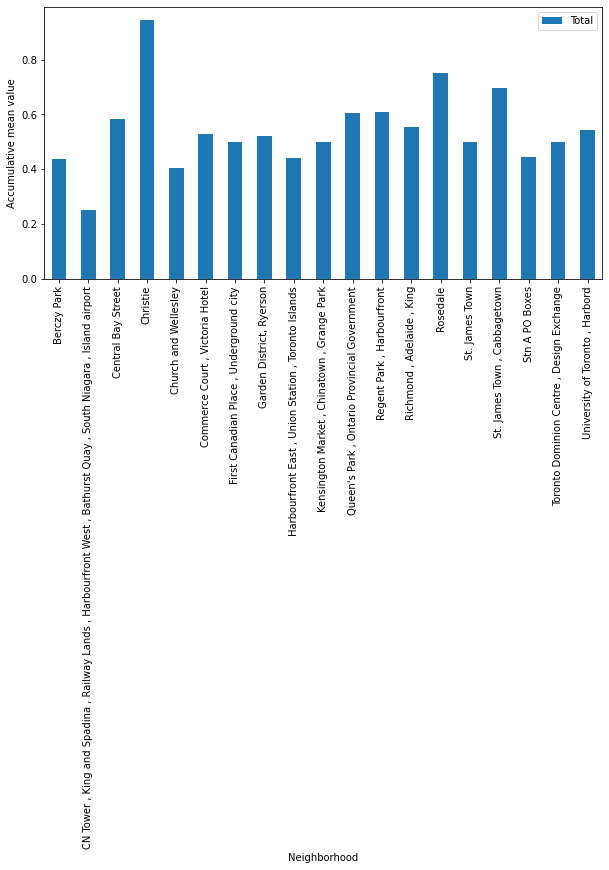

In [158]:
import matplotlib.pyplot as plt
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

house_value.plot(x='Neighborhood',y='Total',kind = 'bar')
plt.xlabel('Neighborhood', fontdict=None, labelpad=None)
plt.ylabel('Accumulative mean value', fontdict=None, labelpad=None)

plt.show()


In [166]:
house_venue_cat

,Neighborhood,American Restaurant,Asian Restaurant,Athletics & Sports,Baby Store,Bakery,Bank,Beach,Bed & Breakfast,Boat or Ferry,Bookstore,Boutique,Breakfast Spot,Bubble Tea Shop,Burger Joint,Burrito Place,Café,Candy Store,Clothing Store,Coffee Shop,Comfort Food Restaurant,Convenience Store,Cupcake Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Donut Shop,Farmers Market,Fast Food Restaurant,Food & Drink Shop,Food Court,Furniture / Home Store,Gas Station,Gift Shop,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Health & Beauty Service,Health Food Store,Hospital,Indian Restaurant,Italian Restaurant,Juice Bar,Market,Park,Pharmacy,Pizza Place,Playground,Rental Car Location,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Shoe Store,Shopping Mall,Supermarket,Tailor Shop,Theater,Women's Store
0,Berczy Park,0.000000,0.000000,0.000000,0.000000,0.035088,0.000000,0.017544,0.000000,0.0000,0.000000,0.0000,0.017544,0.000000,0.000000,0.000000,0.035088,0.000000,0.017544,0.070175,0.017544,0.000000,0.000000,0.000000,0.000000,0.000000,0.017544,0.000000,0.000000,0.035088,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017544,0.017544,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.035088,0.017544,0.000000,0.017544,0.000000,0.000000,0.000000,0.0000,0.035088,0.000000,0.000000,0.000000,0.00,0.000000,0.017544,0.00,0.017544,0.000000,0.000000
1,"CN Tower , King and Spadina , Railway Lands , ...",0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0625,0.000000,0.0625,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0625,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
2,Central Bay Street,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.030769,0.030769,0.000000,0.061538,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.015385,0.000000,0.015385,0.015385,0.015385,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015385,0.000000,0.000000,0.000000,0.015385,0.061538,0.000000,0.000000,0.015385,0.000000,0.000000,0.000000,0.0000,0.015385,0.030769,0.000000,0.046154,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
3,Christie,0.000000,0.000000,0.055556,0.055556,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.166667,0.055556,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.222222,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556,0.000000,0.000000,0.111111,0.000000,0.000000,0.000000,0.0000,0.055556,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
4,Church and Wellesley,0.013889,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.013889,0.0000,0.013889,0.013889,0.027778,0.013889,0.013889,0.000000,0.013889,0.069444,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013889,0.000000,0.000000,0.000000,0.013889,0.013889,0.000000,0.000000,0.000000,0.000000,0.000000,0.013889,0.000000,0.000000,0.013889,0.000000,0.000000,0.013889,0.013889,0.013889,0.000000,0.013889,0.000000,0.013889,0.000000,0.0000,0.041667,0.000000,0.013889,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.013889,0.000000
5,"Commerce Court , Victoria Hotel",0.040000,0.010000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000,0.0000,0.010000,0.0000,0.020000,0.000000,0.010000,0.000000,0.070000,0.000000,0.000000,0.090000,0.000000,0.000000,0.000000,0.030000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

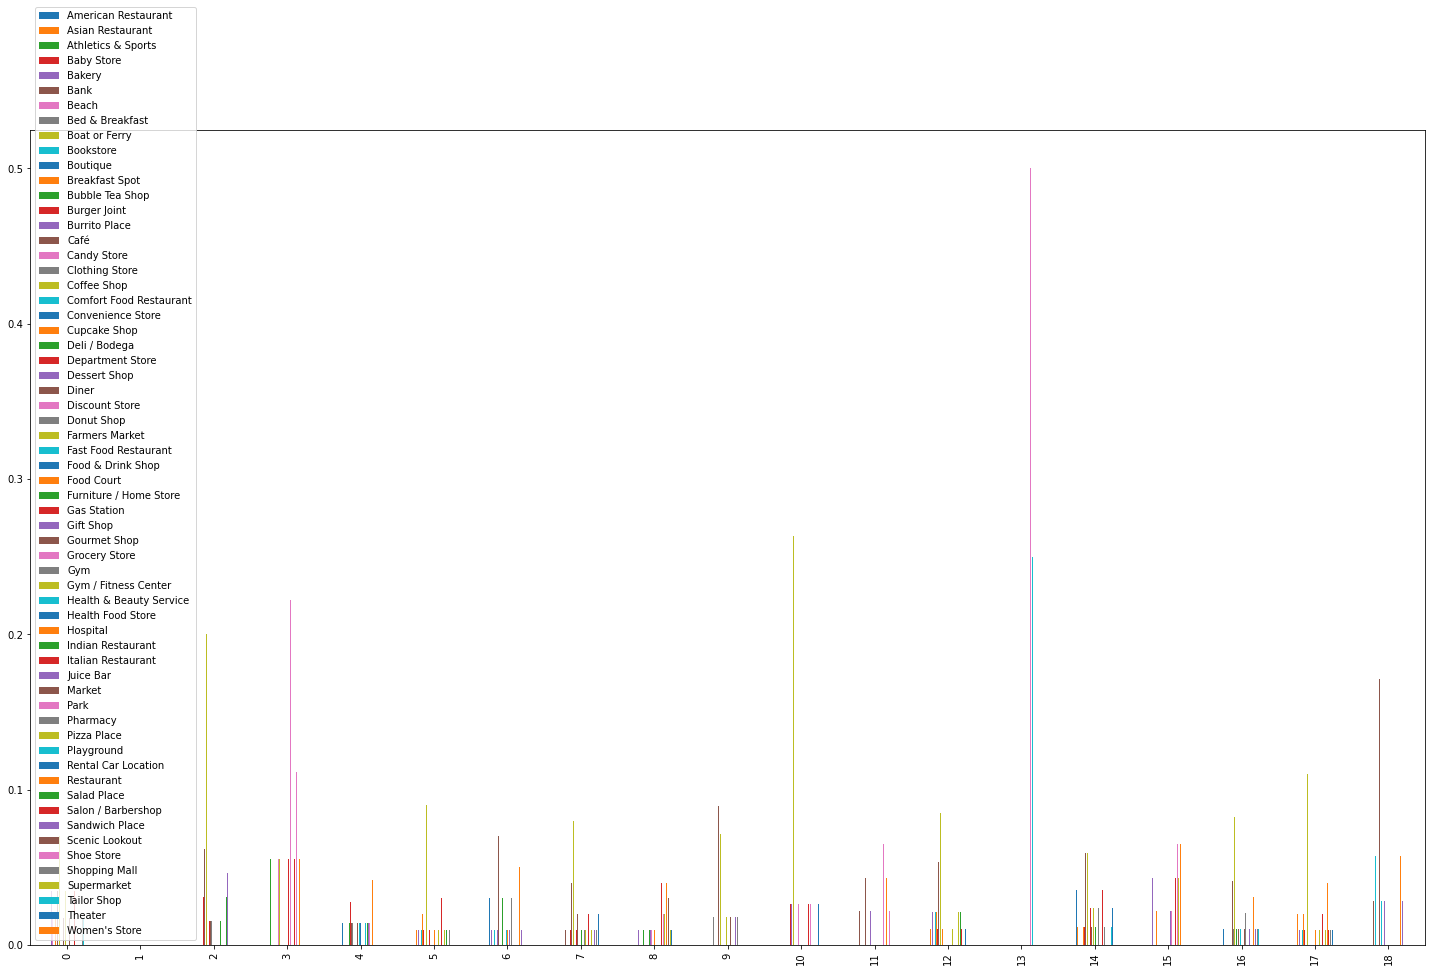

In [165]:
import matplotlib.pyplot as plt
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 25
fig_size[1] = 15
plt.rcParams["figure.figsize"] = fig_size

house_venue_cat.plot(kind='bar')
plt.show()